In [1]:
import numpy as np
import pandas as pd
import requests

# Gather

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open("image_predictions.tsv", mode = 'wb') as outfile:
    outfile.write(r.content)
image_preds = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Done, so comment out so that we don't do it again!

import tweepy
import json

# consumer_key =
# consumer_secret =
# access_token =
# access_secret =

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# i=0
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in twitter_archive.tweet_id.values:
#         i+=1
#         print("{} tweets processed".format(i))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(tweet._json, outfile) #json.dump(tweet._json, outfile)
#             outfile.write("\n")
#         except: # tweepy.TweepError as e:
#             print("Tweet {} skipped!".format(tweet_id))
#             pass

In [5]:
data = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [6]:
# data is list of dictionaries
tweet_json = pd.DataFrame(data)

# Assess

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36553,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7783,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31486,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5765,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23737,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3816,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39879,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7955,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38088,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,8586,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None
2006,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570...,10,10,None,None,None,None,None
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None


In [11]:
# twitter_archive.sample(5)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [14]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Bailey           7
Daisy            7
an               7
Buddy            7
Toby             7
Stanley          6
Scout            6
Oscar            6
Bella            6
Jax              6
Koda             6
Dave             6
Jack             6
Milo             6
Rusty            6
Leo              6
Louis            5
              ... 
Bloo             1
Kollin           1
Ginger           1
Shakespeare      1
Ed               1
Snoopy           1
Spencer          1
Karll            1
Joshwa           1
Mimosa           1
Oddie            1
Sage             1
Miley            1
Rizzo            1
Tripp            1
Socks            1
Dixie            1
Shelby           1
Lucky            1
Glenn            1
Torque           1
Jackie      

In [15]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
image_preds.head()
image_preds[~image_preds.p1_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


#### Quality
##### `twitter_archive` table
- Some of the tweets are retweets, which should be removed
- Not all denominator_rating values are 10 (some are a multiple of 10 that is intentional for multiple dogs; others are simply incorrect)
- Not all numerators are correct (none of the decimal numerators are captured correctly; other times the whole rating is simply wrong)
- Numerator_rating column should be of data type float, to accommodate the few decimal ratings
- There is a tweet about plagarism that is not a rating and doesn't belong in the dataset (#835152434251116546)
- Not all dog names are correct
- There are tweets that are replies (not original we-rate-dogs tweets) that should be removed
- timestamp column should be in datetime format
- Don't need columns source, expanded_urls

##### `tweet_json` table
- We only need the id, retweet_count, and favorite_count columns

##### `image_preds` table
- Don't need columns jpg_url and img_num
- Inconsistent capitalization of dog breed predictions (columns p1, p2, p3)

#### Tidiness
- All data can be merged into 1 dataframe
- Dog types should be listed in one column in the `twitter_archive` table

# Clean

In [17]:
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_preds_clean = image_preds.copy()

### Quality

#### `twitter_archive`: Table included retweets

##### Define
Remove all of the tweets that are retweets.

##### Code

In [18]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [19]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

Now that all the retweets are gone, we don't need the columns pertaining to retweet info, so drop those.

In [20]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### `twitter_archive`: Table includes non-original tweets (replies)

##### Define
Remove all of the tweets that are only replies to other tweets.

##### Code

In [22]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

##### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


Now that all the reply tweets are gone, we don't need the columns pertaining to reply anymore. Remove those.


In [24]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### `twitter_archive`: Table includes incorrect ratings in both the numerator and denominator for various reasons

##### Define

Re-extract both numerator and denominator from the text column. These 2 issues will be fixed together.
In the process, we are making numerator_rating type float instead of int.

##### Code

In [26]:
twitter_archive_clean[['extra1','extra2']] = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)
fixed_num = twitter_archive_clean[twitter_archive_clean.rating_numerator.astype(float)!=twitter_archive_clean.extra1.astype(float)]
fixed_num

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,extra1,extra2
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.5,10
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27,10
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26,10


In [27]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.extra1

In [28]:
twitter_archive_clean.drop('extra1',axis=1,inplace=True)
twitter_archive_clean.drop('extra2',axis=1,inplace=True)

Now see which denominators remain that are not equal to the expected value of 10.

In [29]:
wrong_denominator = twitter_archive_clean[twitter_archive_clean.rating_denominator!=10]
wrong_denominator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


Since there's only 17 with a denominator other than 10, I visually inspected each one by looking at the text. Most of them have a rating for multiple dogs that can be reduced to something out of 10. So, I'll fix that programmatically so the denominator is 10. There's a handful of tweets where I grabbed the wrong fraction (or numbers with a slash between them). I can change these manually.

This one is just wrong. It actually has no rating, so I'll remove it.

In [30]:
twitter_archive_clean.loc[516]

tweet_id                                             810984652412424192
timestamp                                     2016-12-19 23:06:23 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  Meet Sam. She smiles 24/7 &amp; secretly aspir...
expanded_urls         https://www.gofundme.com/sams-smile,https://tw...
rating_numerator                                                     24
rating_denominator                                                    7
name                                                                Sam
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 516, dtype: object

In [31]:
twitter_archive_clean.drop(516,inplace=True)

The following I'm fixing manually:

In [32]:
twitter_archive_clean['rating_numerator'][1068] = 14
twitter_archive_clean['rating_denominator'][1068] = 10

twitter_archive_clean['rating_numerator'][1165] = 13
twitter_archive_clean['rating_denominator'][1165] = 10

twitter_archive_clean['rating_numerator'][1202] = 11
twitter_archive_clean['rating_denominator'][1202] = 10

twitter_archive_clean['rating_numerator'][1662] = 10
twitter_archive_clean['rating_denominator'][1662] = 10

twitter_archive_clean['rating_numerator'][2335] = 9
twitter_archive_clean['rating_denominator'][2335] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWi

In [33]:
wrong_denominator = twitter_archive_clean[twitter_archive_clean.rating_denominator!=10]
wrong_denominator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1635,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


Make sure numerator and denominator are numbers and not strings.

In [34]:
twitter_archive_clean.info()
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null object
rating_denominator    2096 non-null int64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: int64(2), object(10)
memory usage: 292.9+ KB


For tweets that have multiple dogs, for which the rating is a multiple of something out of 10, reduce it to have a denominator of 10, so there's a consistent format and we can compare ratings more easily.

In [35]:
for i in wrong_denominator.index:
    multiple = twitter_archive_clean['rating_denominator'][i]/10
    twitter_archive_clean['rating_denominator'][i] = 10
    twitter_archive_clean['rating_numerator'][i] = twitter_archive_clean['rating_numerator'][i]/multiple

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


##### Test

In [36]:
wrong_denominator = twitter_archive_clean[twitter_archive_clean.rating_denominator!=10]
wrong_denominator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `twitter_archive`: Table includes a post about plagarism that doesn't belong

##### Define
Remove this tweet (#835152434251116546)

##### Code

In [37]:
plagarism_tweet = twitter_archive_clean[twitter_archive_clean.tweet_id==835152434251116546]
twitter_archive_clean.drop(plagarism_tweet.index,inplace=True)

#### `twitter_archive`: timestamp is not in datetime format

##### Define
Change timestamp to datetime format.

##### Code

In [38]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null float64
rating_denominator    2095 non-null int64
name                  2095 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 212.8+ KB


#### `twitter_archive`: Some names are not correct

##### Define
Re-extract names from text column to get rid of cases of "a", "the", and "an" being counted as names.

##### Code

In [40]:
twitter_archive_clean['name_fixed'] = twitter_archive_clean.text.str.extract('(?:named |This is |name is |Meet |Say hello to )([A-Z][a-z]+)',expand=True)

In [41]:
twitter_archive_clean[['name','name_fixed']].sample(10)

,name,name_fixed
389,Pilot,Pilot
1951,George,George
71,Snoopy,Snoopy
354,Tucker,Tucker
2007,Kreg,Kreg
365,Dexter,Dexter
1365,Lucy,Lucy
1521,Cedrick,Cedrick
467,None,NaN
1532,None,NaN


I found cases that my code misses. I'll just fix the 2 I found manually.

In [42]:
twitter_archive_clean.name_fixed.loc[775] = 'O\'Malley'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
# Devon and Fronq with accent on o
twitter_archive_clean['name_fixed'][915] = twitter_archive_clean['name'][915]
twitter_archive_clean['name_fixed'][1559] = twitter_archive_clean['name'][1559]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now replace name column with my temporary name_fixed and drop name_fixed.
Also replace NaNs in name with None, representing no name given rather than a missing value.

In [44]:
twitter_archive_clean.name=twitter_archive_clean.name_fixed
twitter_archive_clean.drop('name_fixed',axis=1,inplace=True)

In [45]:
twitter_archive_clean.name.fillna('None',inplace=True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null float64
rating_denominator    2095 non-null int64
name                  2095 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 292.8+ KB


In [46]:
twitter_archive_clean.name.value_counts()

None         681
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Toby           7
Daisy          7
Bella          6
Oscar          6
Bo             6
Bailey         6
Koda           6
Jax            6
Stanley        6
Bentley        5
Scout          5
Chester        5
Rusty          5
Milo           5
Louis          5
Buddy          5
Zoey           5
Leo            5
Oakley         4
Derek          4
            ... 
Tycho          1
Theo           1
Eve            1
Stubert        1
Erik           1
Reptar         1
Timison        1
Remy           1
Spanky         1
Creg           1
Jebberson      1
Petrick        1
Paull          1
Mimosa         1
Oddie          1
Sage           1
Miley          1
Rizzo          1
Alfonso        1
Tripp          1
Glacier        1
Socks          1
Genevieve      1
Dixie          1
Shelby         1
Joshwa         1
Lucky          1
Torque        

#### `image_preds` Table: Inconsistent capitalization of dog breed predictions in columns p1, p2, p3

##### Define
Make all breeds/predictions lowercase.

##### Code

In [47]:
image_preds_clean.p1 = image_preds_clean.p1.str.lower()
image_preds_clean.p2 = image_preds_clean.p2.str.lower()
image_preds_clean.p3 = image_preds_clean.p3.str.lower()

##### Test

In [48]:
image_preds_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,airedale,0.168762,True,norfolk_terrier,0.107479,True,lakeland_terrier,0.097846,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,saluki,0.122079,True,irish_wolfhound,0.004020,True
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False
1021,710269109699739648,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1,pug,0.415495,True,german_shepherd,0.178157,True,labrador_retriever,0.100202,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,pomeranian,0.997750,True,chihuahua,0.001248,True,pekinese,0.000775,True


#### There are unneeded columns in all three tables

##### Define
Remove these columns.

##### Code

In [49]:
twitter_archive_clean.drop(['source','expanded_urls'], axis=1, inplace=True)

In [50]:
image_preds_clean.drop(['jpg_url','img_num'], axis=1, inplace=True)

In [51]:
cols_to_drop = tweet_json_clean.columns.difference(['id','favorite_count','retweet_count'])
tweet_json_clean.drop(cols_to_drop, axis=1,inplace=True)

##### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null datetime64[ns]
text                  2095 non-null object
rating_numerator      2095 non-null float64
rating_denominator    2095 non-null int64
name                  2095 non-null object
doggo                 2095 non-null object
floofer               2095 non-null object
pupper                2095 non-null object
puppo                 2095 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 260.0+ KB


In [53]:
image_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


In [54]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### Tidiness

#### `twitter_archive`: The dog stages are spread across different variable columns

##### Define
Make one column 'dog_stages' in favor of the 4 stages listed as columns.

##### Code

In [55]:
twitter_archive_clean[['doggo','floofer','pupper','puppo']] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].replace("None",np.nan)
twitter_archive_clean["dog_stages"] = twitter_archive_clean['doggo'].fillna('') + twitter_archive_clean['floofer'].fillna('') + twitter_archive_clean['pupper'].fillna('') + twitter_archive_clean['puppo'].fillna('')
valid_stages = ['pupper','doggo','puppo','floofer','none']

twitter_archive_clean['dog_stages'].replace('','none',inplace=True)

In [56]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace(["doggopupper","doggofloofer","doggopuppo"],"multiple")

In [57]:
twitter_archive_clean.drop(['pupper','doggo','floofer','puppo'],axis=1,inplace=True)

##### Test

In [58]:
twitter_archive_clean.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,none
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,none
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,none
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,None,none
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,none
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo


##### All three tables should be merged into one

##### Define
Merge them, only keeping rows that are present in each table (inner join).

##### Code

In [59]:
twitter_archive_master = twitter_archive_clean.merge(tweet_json_clean,left_on='tweet_id', right_on='id',how='inner')

In [60]:
twitter_archive_master.drop('id',axis=1,inplace=True)

In [61]:
image_preds_clean.rename(columns={'tweet_id': 'id'}, inplace=True)

In [62]:
twitter_archive_master = twitter_archive_master.merge(image_preds_clean,left_on='tweet_id',right_on='id',how='inner')

##### Test

In [63]:
twitter_archive_master.info()
twitter_archive_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 19 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
text                  1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null int64
name                  1962 non-null object
dog_stages            1962 non-null object
favorite_count        1962 non-null int64
retweet_count         1962 non-null int64
id                    1962 non-null int64
p1                    1962 non-null object
p1_conf               1962 non-null float64
p1_dog                1962 non-null bool
p2                    1962 non-null object
p2_conf               1962 non-null float64
p2_dog                1962 non-null bool
p3                    1962 non-null object
p3_conf               1962 non-null float64
p3_dog                1962 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(5), object(6)
memory 

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,none,31486,5765,892177421306343426,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,none,23737,3816,891815181378084864,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none,39879,7955,891689557279858688,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,none,38088,8586,891327558926688256,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [64]:
# save
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Exploratory Data Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### How does the average dog rating change over time?

In [66]:
twitter_archive_master.timestamp.describe()

count                    1962
unique                   1962
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [67]:
twitter_archive_master.sort_values('timestamp')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1961,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8.0,10,None,none,2441,467,666020888022790149,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1960,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7.0,10,None,none,121,42,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
1959,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9.0,10,None,none,114,41,666033412701032449,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1958,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,None,none,274,133,666044226329800704,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1957,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,none,99,41,666049248165822465,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
1956,666050758794694657,2015-11-16 00:30:50,This is a truly beautiful English Wilson Staff...,10.0,10,None,none,125,52,666050758794694657,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
1955,666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but lo...,2.0,10,None,none,1140,788,666051853826850816,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
1954,666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear ...,10.0,10,None,none,411,224,666055525042405380,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1953,666057090499244032,2015-11-16 00:55:59,My oh my. This is a rare blond Canadian terrie...,9.0,10,None,none,274,128,666057090499244032,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
1952,666058600524156928,2015-11-16 01:01:59,Here is the Rand Paul of retrievers folks! He'...,8.0,10,None,none,107,55,666058600524156928,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


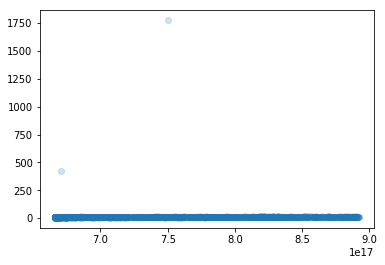

In [68]:
plt.scatter(data=twitter_archive_master,x='tweet_id',y='rating_numerator',alpha=1/5);

Looks like there's 2 outliers we should get rid of.

In [69]:
outliers = twitter_archive_master[twitter_archive_master.rating_numerator>250]
twitter_archive_master.drop(outliers.index, inplace=True)

Text(0.5,1,'Rating over Time')

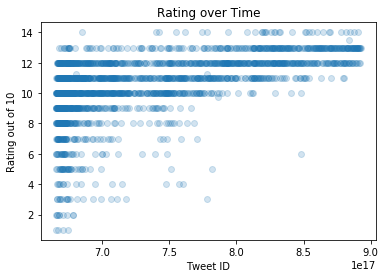

In [70]:
plt.scatter(data=twitter_archive_master,x='tweet_id',y='rating_numerator',alpha=1/5);
plt.xlabel('Tweet ID')
plt.ylabel('Rating out of 10')
plt.title('Rating over Time')

This is interesting, and as I suspected. At least up to the time for which we have tweet data, the ratings tend to get higher. In particular, somewhere around the tweet that starts with 78, which corresponds to around September of 2016, We Rate Dogs had stopped giving any dogs lower than 10/10 (I suspect the 6/10 is another outlier/mistake).

### Is there a correlation between tweet rating, retweet count, and favorite count?

In [71]:
twitter_archive_master.rating_numerator.value_counts()

12.00    448
10.00    418
11.00    398
13.00    250
9.00     151
8.00      95
7.00      51
14.00     34
6.00      32
5.00      32
3.00      19
4.00      15
2.00       9
1.00       4
9.75       1
11.26      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

For this analysis, I will remove the tweets that have a non-integer numerator rating, since there's only 4 of them, so I can treat the rating variable as discrete.

In [72]:
# twitter_archive_master_decimals = twitter_archive_master[(twitter_archive_master.rating_numerator==9.75) | (twitter_archive_master.rating_numerator==11.26) | (twitter_archive_master.rating_numerator==13.5) | (twitter_archive_master.rating_numerator==11.27)]
# twitter_archive_master_ints = twitter_archive_master.drop(twitter_archive_master_decimals.index)

In [73]:
# twitter_archive_master_ints.rating_numerator = twitter_archive_master_ints.rating_numerator.astype('int')
# twitter_archive_master_ints.info()

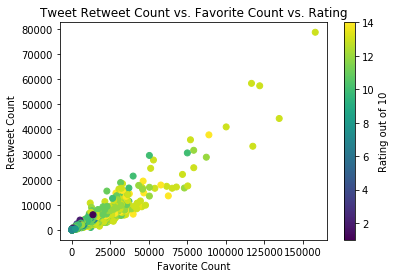

In [74]:
plt.scatter(data=twitter_archive_master,x='favorite_count',y='retweet_count',c='rating_numerator',cmap='viridis');
cbar = plt.colorbar()
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
cbar.set_label('Rating out of 10')
plt.title('Tweet Retweet Count vs. Favorite Count vs. Rating');

In [75]:
np.corrcoef([twitter_archive_master['favorite_count'],twitter_archive_master['retweet_count'],twitter_archive_master['rating_numerator']])

array([[ 1.        ,  0.92941738,  0.40030519],
       [ 0.92941738,  1.        ,  0.30014094],
       [ 0.40030519,  0.30014094,  1.        ]])

There appears to be a strong positive correlation (r=0.93) between favorite_count and retweet count. The correlation between the rating and favorite count, and between rating and retweet count, on the other hand, are moderate (r=0.4 and r=0.3, respectively). This is reflected in the multivariate scatterplot above.

### Which dog breeds are most popular?

In [76]:
twitter_archive_master.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,none,31486,5765,892177421306343426,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,none,23737,3816,891815181378084864,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none,39879,7955,891689557279858688,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,none,38088,8586,891327558926688256,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,none,19157,2868,891087950875897856,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,none,11161,1878,890971913173991426,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,None,none,61631,17372,890729181411237888,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,none,26390,3953,890609185150312448,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,30174,6766,890240255349198849,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


First, make a new column for predicted dog breed, based on the most likely predictions out of the three given that are actually dog breeds. If no valid breeds are given, remove those for this analysis.

In [77]:
twitter_archive_master['pred_breed'] = twitter_archive_master.p1
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,orange
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,none,31486,5765,892177421306343426,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,none,23737,3816,891815181378084864,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none,39879,7955,891689557279858688,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,paper_towel
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,none,38088,8586,891327558926688256,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,basset


In [78]:
p1_not_dog = twitter_archive_master[~twitter_archive_master.p1_dog]
p1_not_dog

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,orange
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none,39879,7955,891689557279858688,paper_towel,0.170278,False,labrador_retriever,1.680860e-01,True,spatula,4.083590e-02,False,paper_towel
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10,None,none,43854,10830,887517139158093824,limousine,0.130432,False,tow_truck,2.917540e-02,False,shopping_cart,2.632080e-02,False,limousine
27,886680336477933568,2017-07-16 20:14:00,This is Derek. He's late for a dog meeting. 13...,13.0,10,Derek,none,21250,4113,886680336477933568,convertible,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False,convertible
46,882045870035918850,2017-07-04 01:18:17,"This is Koko. Her owner, inspired by Barney, r...",13.0,10,Koko,none,27761,4513,882045870035918850,web_site,0.949591,False,dhole,1.732580e-02,False,golden_retriever,6.940630e-03,True,web_site
50,881268444196462592,2017-07-01 21:49:04,Meet Elliot. He's a Canadian Forrest Pup. Unus...,12.0,10,Elliot,none,21962,4843,881268444196462592,tusker,0.473303,False,indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False,tusker
51,880935762899988482,2017-06-30 23:47:07,This is Louis. He's crossing. It's a big deal....,13.0,10,Louis,none,16153,2574,880935762899988482,street_sign,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False,street_sign
59,879376492567855104,2017-06-26 16:31:08,This is Jack AKA Stephen Furry. You're not sco...,12.0,10,Jack,none,15920,2893,879376492567855104,tricycle,0.663601,False,labrador_retriever,3.349610e-02,True,pembroke,1.882660e-02,True,tricycle
60,879050749262655488,2017-06-25 18:56:45,This is Steven. He has trouble relating to oth...,11.0,10,Steven,none,21366,4323,879050749262655488,tabby,0.311861,False,window_screen,1.691230e-01,False,egyptian_cat,1.329320e-01,False,tabby
85,872122724285648897,2017-06-06 16:07:15,This is Kody. He's a baller. Wishes he was a l...,12.0,10,Kody,none,32724,7540,872122724285648897,basketball,0.808396,False,pug,6.673630e-02,True,dalmatian,5.456980e-02,True,basketball


In [79]:
twitter_archive_master.pred_breed[p1_not_dog.index] = twitter_archive_master.p2[p1_not_dog.index]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
p12_not_dog = twitter_archive_master[~twitter_archive_master.p1_dog & ~twitter_archive_master.p2_dog]
p12_not_dog

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,bagel
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10,None,none,43854,10830,887517139158093824,limousine,0.130432,False,tow_truck,2.917540e-02,False,shopping_cart,2.632080e-02,False,tow_truck
27,886680336477933568,2017-07-16 20:14:00,This is Derek. He's late for a dog meeting. 13...,13.0,10,Derek,none,21250,4113,886680336477933568,convertible,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False,sports_car
46,882045870035918850,2017-07-04 01:18:17,"This is Koko. Her owner, inspired by Barney, r...",13.0,10,Koko,none,27761,4513,882045870035918850,web_site,0.949591,False,dhole,1.732580e-02,False,golden_retriever,6.940630e-03,True,dhole
50,881268444196462592,2017-07-01 21:49:04,Meet Elliot. He's a Canadian Forrest Pup. Unus...,12.0,10,Elliot,none,21962,4843,881268444196462592,tusker,0.473303,False,indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False,indian_elephant
51,880935762899988482,2017-06-30 23:47:07,This is Louis. He's crossing. It's a big deal....,13.0,10,Louis,none,16153,2574,880935762899988482,street_sign,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False,umbrella
60,879050749262655488,2017-06-25 18:56:45,This is Steven. He has trouble relating to oth...,11.0,10,Steven,none,21366,4323,879050749262655488,tabby,0.311861,False,window_screen,1.691230e-01,False,egyptian_cat,1.329320e-01,False,window_screen
90,870804317367881728,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,11.0,10,None,none,32134,5798,870804317367881728,home_theater,0.168290,False,sandbar,9.804040e-02,False,television,7.972940e-02,False,sandbar
94,870063196459192321,2017-05-31 23:43:25,Meet Clifford. He's quite large. Also red. Goo...,14.0,10,Clifford,none,34956,7796,870063196459192321,comic_book,0.534409,False,envelope,2.807220e-01,False,book_jacket,4.378550e-02,False,envelope
112,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus....,14.0,10,None,none,31094,8250,864873206498414592,pole,0.478616,False,lakeside,1.141820e-01,False,wreck,5.592650e-02,False,lakeside


In [81]:
twitter_archive_master.pred_breed[p12_not_dog.index] = twitter_archive_master.p3[p12_not_dog.index]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
p123_not_dog = twitter_archive_master[~twitter_archive_master.p1_dog & ~twitter_archive_master.p2_dog & ~twitter_archive_master.p3_dog]
p123_not_dog

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none,36553,7783,892420643555336193,orange,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,banana
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10,None,none,43854,10830,887517139158093824,limousine,0.130432,False,tow_truck,2.917540e-02,False,shopping_cart,2.632080e-02,False,shopping_cart
27,886680336477933568,2017-07-16 20:14:00,This is Derek. He's late for a dog meeting. 13...,13.0,10,Derek,none,21250,4113,886680336477933568,convertible,0.738995,False,sports_car,1.399520e-01,False,car_wheel,4.417270e-02,False,car_wheel
50,881268444196462592,2017-07-01 21:49:04,Meet Elliot. He's a Canadian Forrest Pup. Unus...,12.0,10,Elliot,none,21962,4843,881268444196462592,tusker,0.473303,False,indian_elephant,2.456460e-01,False,ibex,5.566070e-02,False,ibex
51,880935762899988482,2017-06-30 23:47:07,This is Louis. He's crossing. It's a big deal....,13.0,10,Louis,none,16153,2574,880935762899988482,street_sign,0.251801,False,umbrella,1.151230e-01,False,traffic_light,6.953380e-02,False,traffic_light
60,879050749262655488,2017-06-25 18:56:45,This is Steven. He has trouble relating to oth...,11.0,10,Steven,none,21366,4323,879050749262655488,tabby,0.311861,False,window_screen,1.691230e-01,False,egyptian_cat,1.329320e-01,False,egyptian_cat
90,870804317367881728,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,11.0,10,None,none,32134,5798,870804317367881728,home_theater,0.168290,False,sandbar,9.804040e-02,False,television,7.972940e-02,False,television
94,870063196459192321,2017-05-31 23:43:25,Meet Clifford. He's quite large. Also red. Goo...,14.0,10,Clifford,none,34956,7796,870063196459192321,comic_book,0.534409,False,envelope,2.807220e-01,False,book_jacket,4.378550e-02,False,book_jacket
112,864873206498414592,2017-05-17 16:00:15,We only rate dogs. Please don't send in Jesus....,14.0,10,None,none,31094,8250,864873206498414592,pole,0.478616,False,lakeside,1.141820e-01,False,wreck,5.592650e-02,False,wreck
115,863907417377173506,2017-05-15 00:02:33,This is Albus. He's quite impressive at hide a...,13.0,10,Albus,none,19869,3925,863907417377173506,marmot,0.358828,False,meerkat,1.747030e-01,False,weasel,1.234850e-01,False,weasel


In [83]:
twitter_archive_master_breeds = twitter_archive_master.drop(p123_not_dog.index)
twitter_archive_master_breeds.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
272,828372645993398273,2017-02-05 22:40:03,This is Alexander Hamilpup. He was one of the ...,12.0,10,Alexander,none,12778,2996,828372645993398273,malamute,0.663047,True,eskimo_dog,0.207779,True,tibetan_mastiff,0.040949,True,malamute
1225,687818504314159109,2016-01-15 02:08:05,With great pupper comes great responsibility. ...,12.0,10,None,pupper,2512,952,687818504314159109,lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True,lakeland_terrier
972,709207347839836162,2016-03-14 02:39:42,This is Penny. She's trying on her prom dress....,11.0,10,Penny,none,12660,5832,709207347839836162,chihuahua,0.948323,True,italian_greyhound,0.017730,True,quilt,0.016688,False,chihuahua
510,783466772167098368,2016-10-05 00:40:09,This is Finn. He likes eavesdropping from fili...,11.0,10,Finn,none,8701,2316,783466772167098368,chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True,chihuahua
1702,670789397210615808,2015-11-29 02:20:29,Two obedient dogs here. Left one has extra leg...,9.0,10,None,none,647,230,670789397210615808,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True,beagle
1654,671542985629241344,2015-12-01 04:14:59,"This is JD (stands for ""just dog""). He's like ...",10.0,10,None,none,1067,545,671542985629241344,shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True,shetland_sheepdog
1706,670780561024270336,2015-11-29 01:45:22,This is Traviss. He has no ears. Two rare dogs...,7.0,10,Traviss,none,770,281,670780561024270336,labrador_retriever,0.244889,True,american_black_bear,0.056994,False,brown_bear,0.053993,False,labrador_retriever
336,817171292965273600,2017-01-06 00:49:53,This is Tebow. He kindly requests that you put...,13.0,10,Tebow,none,8981,2083,817171292965273600,golden_retriever,0.295483,True,irish_setter,0.144431,True,chesapeake_bay_retriever,0.077879,True,golden_retriever
1957,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,none,99,41,666049248165822465,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher
945,711743778164514816,2016-03-21 02:38:34,Meet Roosevelt. He's calculating the best case...,11.0,10,Roosevelt,none,2854,988,711743778164514816,lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True,lakeland_terrier


To make comparison of breeds more statistically fair, only consider those that are in at least 20 different tweets.

In [84]:
twitter_archive_master_breeds.pred_breed.value_counts()

golden_retriever               155
labrador_retriever             104
pembroke                        94
chihuahua                       90
pug                             62
toy_poodle                      49
chow                            48
pomeranian                      41
samoyed                         41
malamute                        33
chesapeake_bay_retriever        31
french_bulldog                  30
cocker_spaniel                  30
miniature_pinscher              24
eskimo_dog                      22
cardigan                        21
german_shepherd                 21
shih-tzu                        20
siberian_husky                  20
beagle                          20
maltese_dog                     19
staffordshire_bullterrier       19
shetland_sheepdog               18
rottweiler                      18
kuvasz                          17
basset                          17
italian_greyhound               17
lakeland_terrier                17
west_highland_white_

In [85]:
top_tweeted_breeds = twitter_archive_master_breeds.pred_breed.value_counts()[twitter_archive_master_breeds.pred_breed.value_counts().values>=20]
top_tweeted_breeds

golden_retriever            155
labrador_retriever          104
pembroke                     94
chihuahua                    90
pug                          62
toy_poodle                   49
chow                         48
pomeranian                   41
samoyed                      41
malamute                     33
chesapeake_bay_retriever     31
french_bulldog               30
cocker_spaniel               30
miniature_pinscher           24
eskimo_dog                   22
cardigan                     21
german_shepherd              21
shih-tzu                     20
siberian_husky               20
beagle                       20
Name: pred_breed, dtype: int64

In [86]:
top_tweeted_breeds.index

Index(['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua',
       'pug', 'toy_poodle', 'chow', 'pomeranian', 'samoyed', 'malamute',
       'chesapeake_bay_retriever', 'french_bulldog', 'cocker_spaniel',
       'miniature_pinscher', 'eskimo_dog', 'cardigan', 'german_shepherd',
       'shih-tzu', 'siberian_husky', 'beagle'],
      dtype='object')

In [87]:
top_breeds = top_tweeted_breeds.index.tolist()
top_breeds

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'pomeranian',
 'samoyed',
 'malamute',
 'chesapeake_bay_retriever',
 'french_bulldog',
 'cocker_spaniel',
 'miniature_pinscher',
 'eskimo_dog',
 'cardigan',
 'german_shepherd',
 'shih-tzu',
 'siberian_husky',
 'beagle']

In [88]:
twitter_archive_master_top_breeds = twitter_archive_master_breeds[twitter_archive_master_breeds.pred_breed.isin(top_breeds)]
twitter_archive_master_top_breeds.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_breed
1062,701214700881756160,2016-02-21 01:19:47,"I'm not sure what's happening here, but it's p...",12.0,10,None,none,12307,5142,701214700881756160,chihuahua,0.615163,True,pembroke,0.159509,True,basenji,0.084466,True,chihuahua
811,736365877722001409,2016-05-28 01:18:00,This is Rory. He's extremely impatient. 11/10 ...,11.0,10,Rory,pupper,4005,1258,736365877722001409,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False,toy_poodle
114,864197398364647424,2017-05-15 19:14:50,This is Paisley. She ate a flower just to prov...,13.0,10,Paisley,none,28953,8412,864197398364647424,golden_retriever,0.945905,True,labrador_retriever,0.021264,True,tibetan_mastiff,0.020493,True,golden_retriever
1041,703611486317502464,2016-02-27 16:03:45,Meet Scooter. He's experiencing the pupper equ...,10.0,10,Scooter,pupper,3866,1537,703611486317502464,pembroke,0.756441,True,basenji,0.126621,True,cardigan,0.080117,True,pembroke
307,821886076407029760,2017-01-19 01:04:45,This is Jimison. He was just called a good boy...,13.0,10,Jimison,none,11576,2368,821886076407029760,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,irish_setter,0.151631,True,golden_retriever


Calculate popularity based on average rating, retweet count, and favorite count.

In [89]:
mean_ratings_breed = twitter_archive_master_top_breeds.groupby('pred_breed').rating_numerator.mean().nlargest(3)
mean_ratings_breed

pred_breed
samoyed             11.731707
golden_retriever    11.622581
pembroke            11.425532
Name: rating_numerator, dtype: float64

In [90]:
mean_retweet_breed = twitter_archive_master_top_breeds.groupby('pred_breed').retweet_count.mean().nlargest(3)
mean_retweet_breed

pred_breed
french_bulldog    4854.9
cocker_spaniel    4384.1
eskimo_dog        4285.5
Name: retweet_count, dtype: float64

In [91]:
mean_retweet_breed = twitter_archive_master_top_breeds.groupby('pred_breed').favorite_count.mean().nlargest(3)
mean_retweet_breed

pred_breed
french_bulldog    18908.533333
cocker_spaniel    12766.800000
samoyed           12727.121951
Name: favorite_count, dtype: float64

The top 3 most popularly represented breeds in We Rate Dogs' tweets are Golden Retriever, Laborator Retriever, and Pembroke (aka Corgi). Filtering down to just the top 20 most-tweeted breeds, the top 3 highest-rated breeds were Samoyed, Golden Retriever, and Pembroke. The top 3 most retweeted breeds were French Bulldog, Cocker Spaniel, and Eskimo Dog. Finally, the top 3 most-favorite'd breeds were French Bulldog, Cocker Spaniel, and Samoyed.

### What are the most popular dog names?

In [92]:
twitter_archive_master.name.value_counts()

None           596
Charlie         10
Oliver          10
Cooper          10
Tucker           9
Penny            9
Lucy             9
Winston          8
Sadie            8
Toby             7
Lola             7
Daisy            7
Bo               6
Bella            6
Stanley          6
Jax              6
Koda             6
Chester          5
Louis            5
Bailey           5
Milo             5
Oscar            5
Zoey             5
Rusty            5
Buddy            5
Scout            5
Leo              5
Scooter          4
Gary             4
Larry            4
              ... 
Kollin           1
Ginger           1
Shakespeare      1
Tess             1
Glenn            1
Diogi            1
Creg             1
Orion            1
Petrick          1
Paull            1
Mimosa           1
Sage             1
Miley            1
Rizzo            1
Alfonso          1
Tripp            1
Glacier          1
Socks            1
Genevieve        1
Dixie            1
Shelby           1
Joshwa      

The top 3 most popular dog names were Charlie, Oliver, and Cooper.

### Limitations of Analysis

This analysis had a lot of limitations. The ratings were difficult to analyze. First of all, the data was hard to clean perfectly. Beyond that, there are some ratings that are jokes (9.75 for a dog dressed like a wizard from Harry Potter, or ‘10&2’ for a dog driving). Several I noticed were low (less than 10/10), but then in the comments were adjusted or ‘pupgraded’. My code didn’t account for that, since it took out tweets that were replies.
Furthermore, the dog breed predictions table was nowhere near perfect.
